## Terminology 

$$T_{n}$$ Average daily temperature :
$$T^{max}$$ Maximum temperature in a given day :
$$T^{min}$$ Minimum temperature in a given day :

For simplification, we will consider the following to be true: 

$$T_{n} = \frac{T^{max}+T^{min}}{2}$$

For each day period $n\in\mathbb{N}$: 
Heating degree days $$HDD_{n} = (65 - T_{n}^{max})^{+} \approx (65 - T_{n})^{+}$$
Cooling degree days $$CDD_{n} = (T_{n}^{min} - 65)^{+} \approx (T_{n} - 65)^{+}$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
# Example 
temps = np.random.normal(65,5,92) # Temperature normally distributed for 3 months
HDD_p = np.maximum(0, 65-temps)
CDD_p = np.maximum(0, temps-65)

df = pd.DataFrame(np.array([temps, HDD_p, CDD_p]).T, index=range(1,len(temps)+1), columns=['Avg Temp', 'HDD', 'CDD'])
df.loc['Total'] = pd.Series(df[['HDD', 'CDD']].sum())
round(df,2)

,Avg Temp,HDD,CDD
1,62.85,2.15,0.00
2,65.20,0.00,0.20
3,65.69,0.00,0.69
4,64.14,0.86,0.00
5,58.42,6.58,0.00
...,...,...,...
89,69.65,0.00,4.65
90,77.58,0.00,12.58
91,72.01,0.00,7.01
92,70.15,0.00,5.15


## Traded Products 

For a day $n\in\mathbb{N}:$

 * $HDD_{n} = (T_{ref} - T_{n})^{+}$
 * $CDD_{n} = (T_{n} - T_{ref})^{+}$

Payoff function is computed on the cumulative index over a period $P$: 

$$\zeta = f(DD)$$

 * Heating degree seasons: $$DD = H_{n} = HDD^{N} = \sum_{n}^{N} HDD_{n}$$
 * Cooling degree seasons: $$DD = C_{n} = CDD^{N} = \sum_{n}^{N} CDD_{n}$$

In [4]:
alpha = 5000
beta = 5000
Kc = 750
Kp = 550
C = 5e5
F = 1e6

DD = np.arange(200,1000,10)
call = np.minimum(alpha*np.maximum(DD-Kc,0), C)
put = np.minimum(alpha*np.maximum(Kp-DD,0), F)
collar = call - put

## Payoff Functions

### Call with Cap 
$\zeta = \min{\{\alpha(DD-K)^{+}, C}\},$

where $\alpha$ is the payoff rate and $C$ is the caps. 

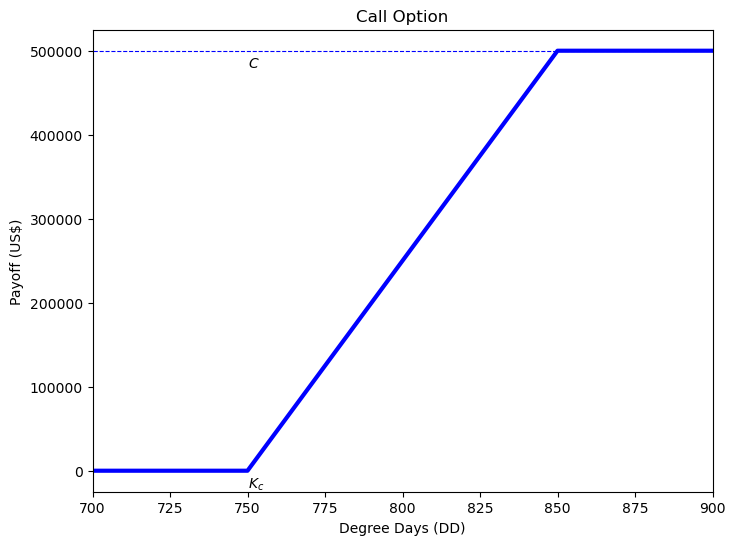

In [6]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, call, 'b', linewidth=3, label='Call')
plt.plot([200,1000],[C,C], 'b--', linewidth=0.8)

plt.text(750, C-.2e5, r'$C$')
plt.text(Kc, -.2e5, r'$K_c$')
plt.xlim([700,900])

plt.title('Call Option')
plt.xlabel('Degree Days (DD)')
plt.ylabel('Payoff (US$)')
plt.legend
plt.show()

### Put with Floor 
$\zeta = \min{\{\alpha(K-DD)^{+}, F}\},$

where $\alpha$ is the payoff rate and $F$ is the floors. 

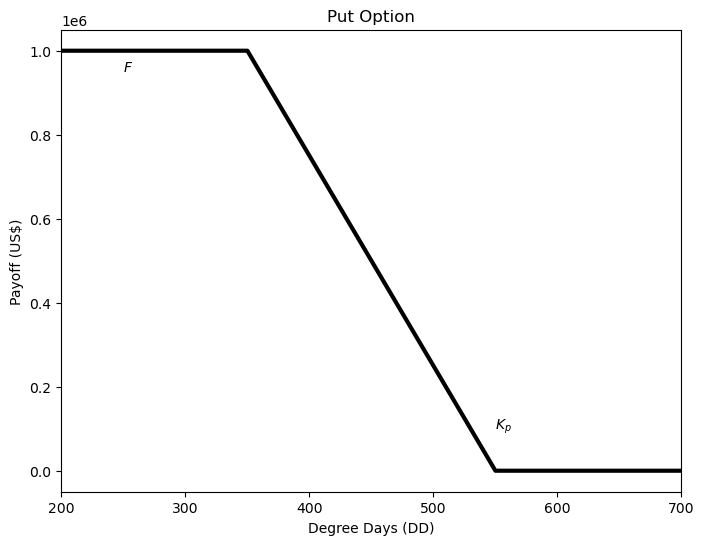

In [9]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, put, 'k', linewidth=3, label='Put')

plt.text(250, F-5e4, r'$F$')
plt.text(Kp, +.1e6, r'$K_p$')
plt.xlim([200,700])

plt.title('Put Option')
plt.xlabel('Degree Days (DD)')
plt.ylabel('Payoff (US$)')
plt.legend
plt.show()

### Collar
$\zeta = \min{\{\alpha(DD-K_{1})^{+}, C\}} - \min{\{\beta(K_{2}-DD)^{+}, F\}},$

where $\alpha$ and $\beta$ are the payoff rates for heating and cooling degree days respectively, $C$ is cap and $F$ is the floors. 

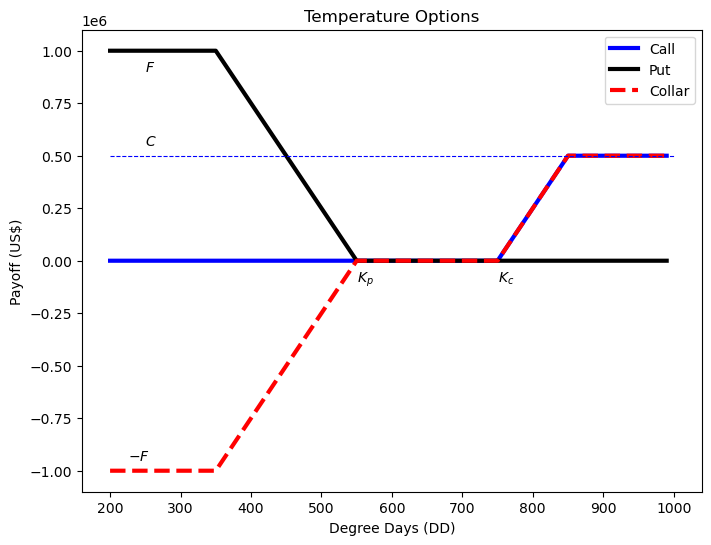

In [10]:
fig = plt.figure(figsize=(8,6))
plt.plot(DD, call, 'b', linewidth=3, label='Call')
plt.plot(DD, put, 'k', linewidth=3, label='Put')
plt.plot(DD, collar, 'r--', linewidth=3, label='Collar')
plt.plot([200,1000], [C,C], 'b--', linewidth=0.8)

plt.text(250, C+.5e5, r'$C$')
plt.text(250, F-1e5, r'$F$')
plt.text(225, -F+.5e5, r'$-F$')

plt.text(Kc, -.1e6, r'$K_c$')
plt.text(Kp, -.1e6, r'$K_p$')

plt.title('Temperature Options')
plt.xlabel('Degree Days (DD)')
plt.ylabel('Payoff (US$)')
plt.legend()
plt.show()